# Downsampled Cellpose Segmentation on human protein atlas images

In [1]:
import os
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolSegmentationDownsamplingCellpose
from scportrait.pipeline.selection import LMDSelection

In [2]:
project_location = "project_downsampling"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example2.yml",
    overwrite=True,
    debug=True,
    segmentation_f=CytosolSegmentationDownsamplingCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[20/03/2025 14:22:23] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/config.yml
[20/03/2025 14:22:24] Compression algorithm for extracted single-cell images: lzf
[20/03/2025 14:22:24] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.
[20/03/2025 14:22:24] No cache directory specified in config using current working directory /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2.


In [3]:
from scportrait.data._datasets import dataset_2

dataset_2_path = dataset_2()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_2_path}/Ch1.tif", f"{dataset_2_path}/Ch2.tif", f"{dataset_2_path }/Ch3.tif"]

project.load_input_from_tif_files(images, channel_names = ["Channel1", "Channel2", "Channel3"])

[20/03/2025 14:22:24] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampli
         ng/scportrait.sdata                                                                                       


[20/03/2025 14:22:24] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_s6hxdqip for Project
[20/03/2025 14:22:24] Image input_image written to sdata object.
[20/03/2025 14:22:24] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/Project_s6hxdqip'>


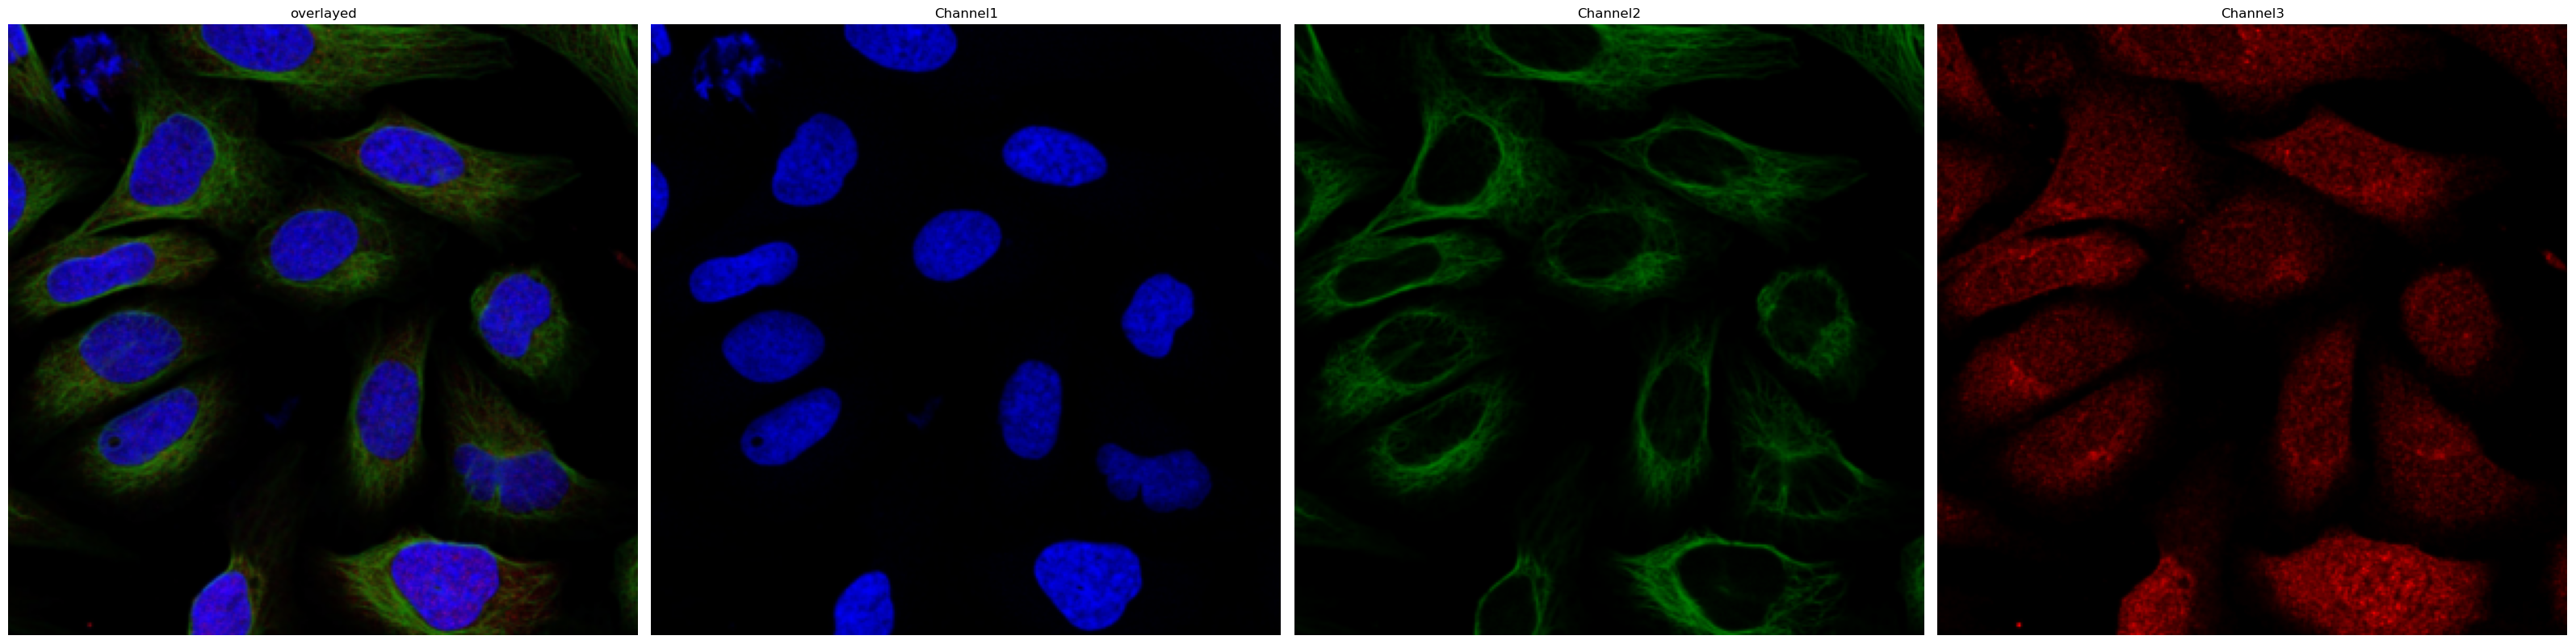

In [4]:
project.plot_input_image()

[20/03/2025 14:22:31] Smoothing Kernel size not explicitly defined. Will calculate a default value based on the downsampling factor.
[20/03/2025 14:22:31] Performing image padding to ensure that image is compatible with selected downsample kernel size of 2.
[20/03/2025 14:22:31] Downsampling image by a factor of 2x2
[20/03/2025 14:22:31] GPU Status for segmentation is True and will segment using the following device mps.
[20/03/2025 14:22:31] Segmenting nucleus using the following model: nuclei
[20/03/2025 14:22:33] Segmenting cytosol using the following model: cyto2


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[20/03/2025 14:22:34] Performing filtering to match Cytosol and Nucleus IDs.
[20/03/2025 14:22:34] Removed 1 nuclei and 0 cytosols due to filtering.
[20/03/2025 14:22:34] After filtering, 9 matching nuclei and cytosol masks remain.
[20/03/2025 14:22:34] Total time to perform nucleus and cytosol mask matching filtering: 0.50 seconds
[20/03/2025 14:22:34] Segmentation seg_all_nucleus written to sdata object.
[20/03/2025 14:22:36] Points centers_seg_all_nucleus written to sdata object.
[20/03/2025 14:22:36] Segmentation seg_all_cytosol written to sdata object.
[20/03/2025 14:22:36] Points centers_seg_all_cytosol written to sdata object.


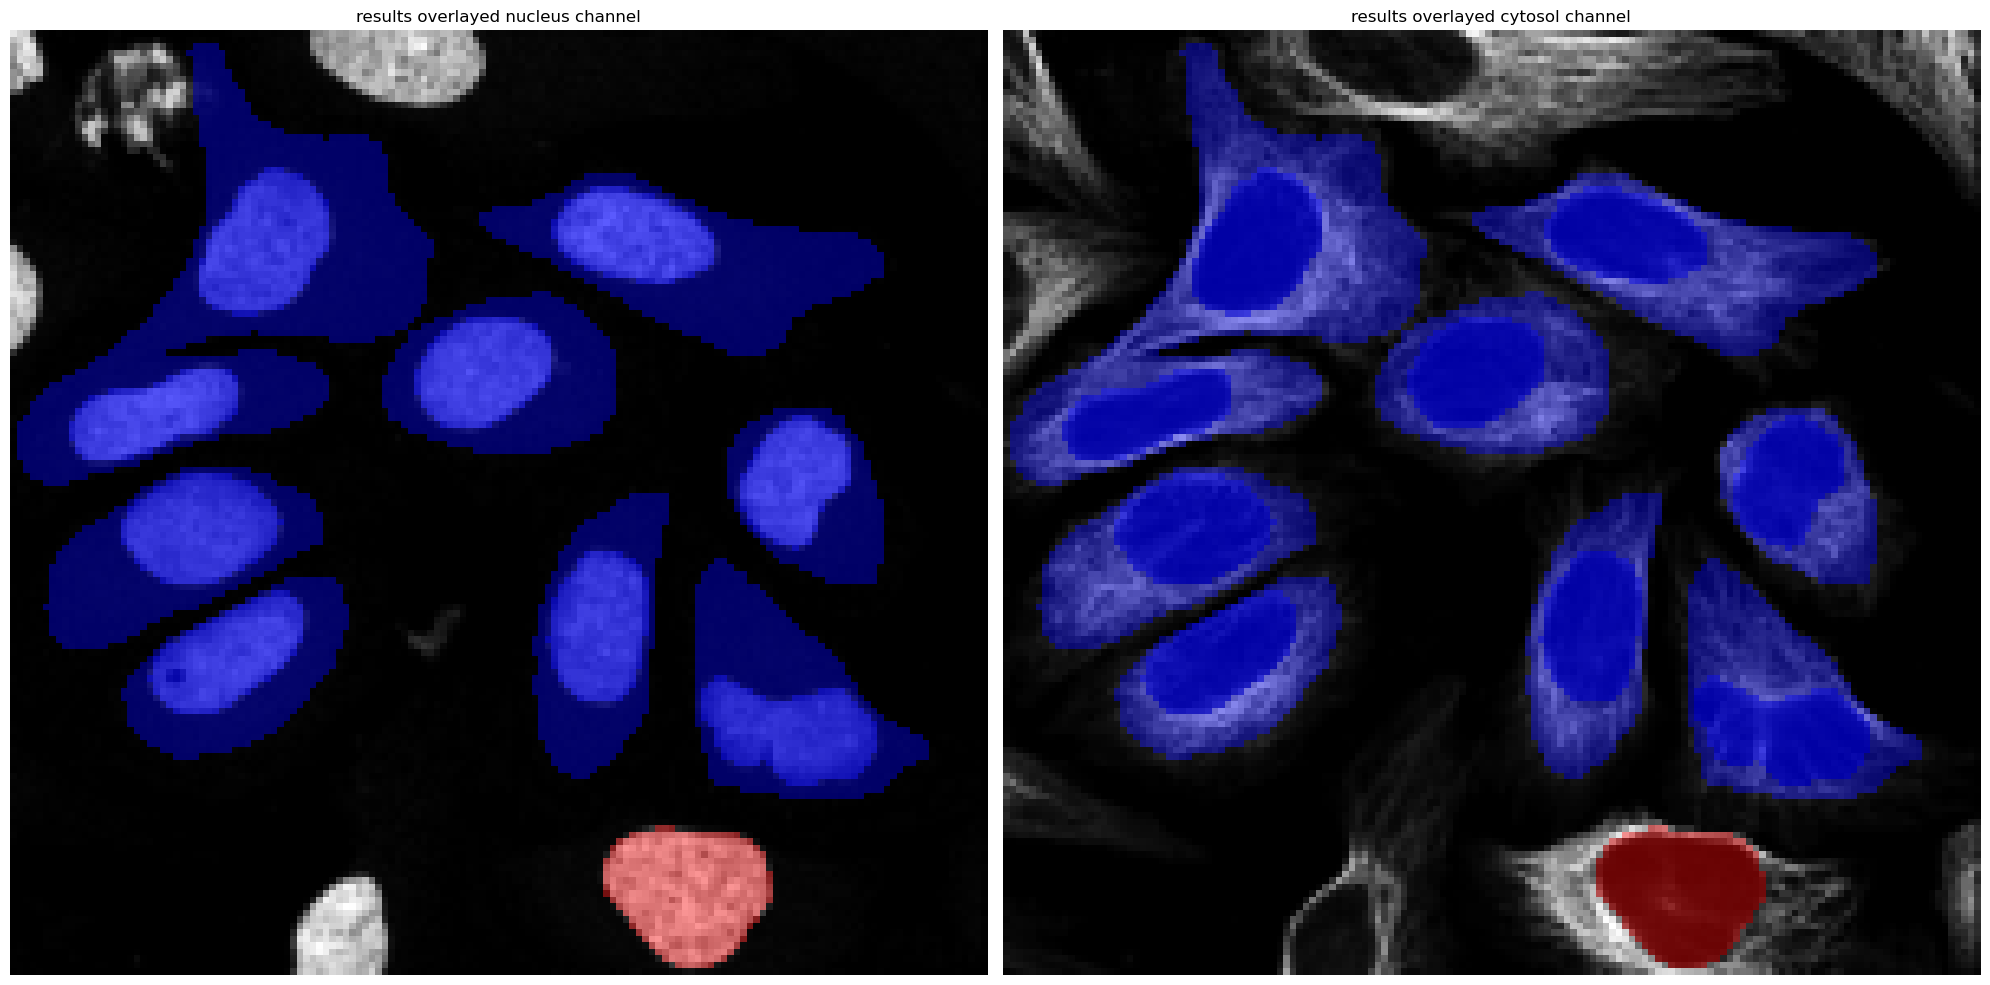

In [5]:
project.segment()

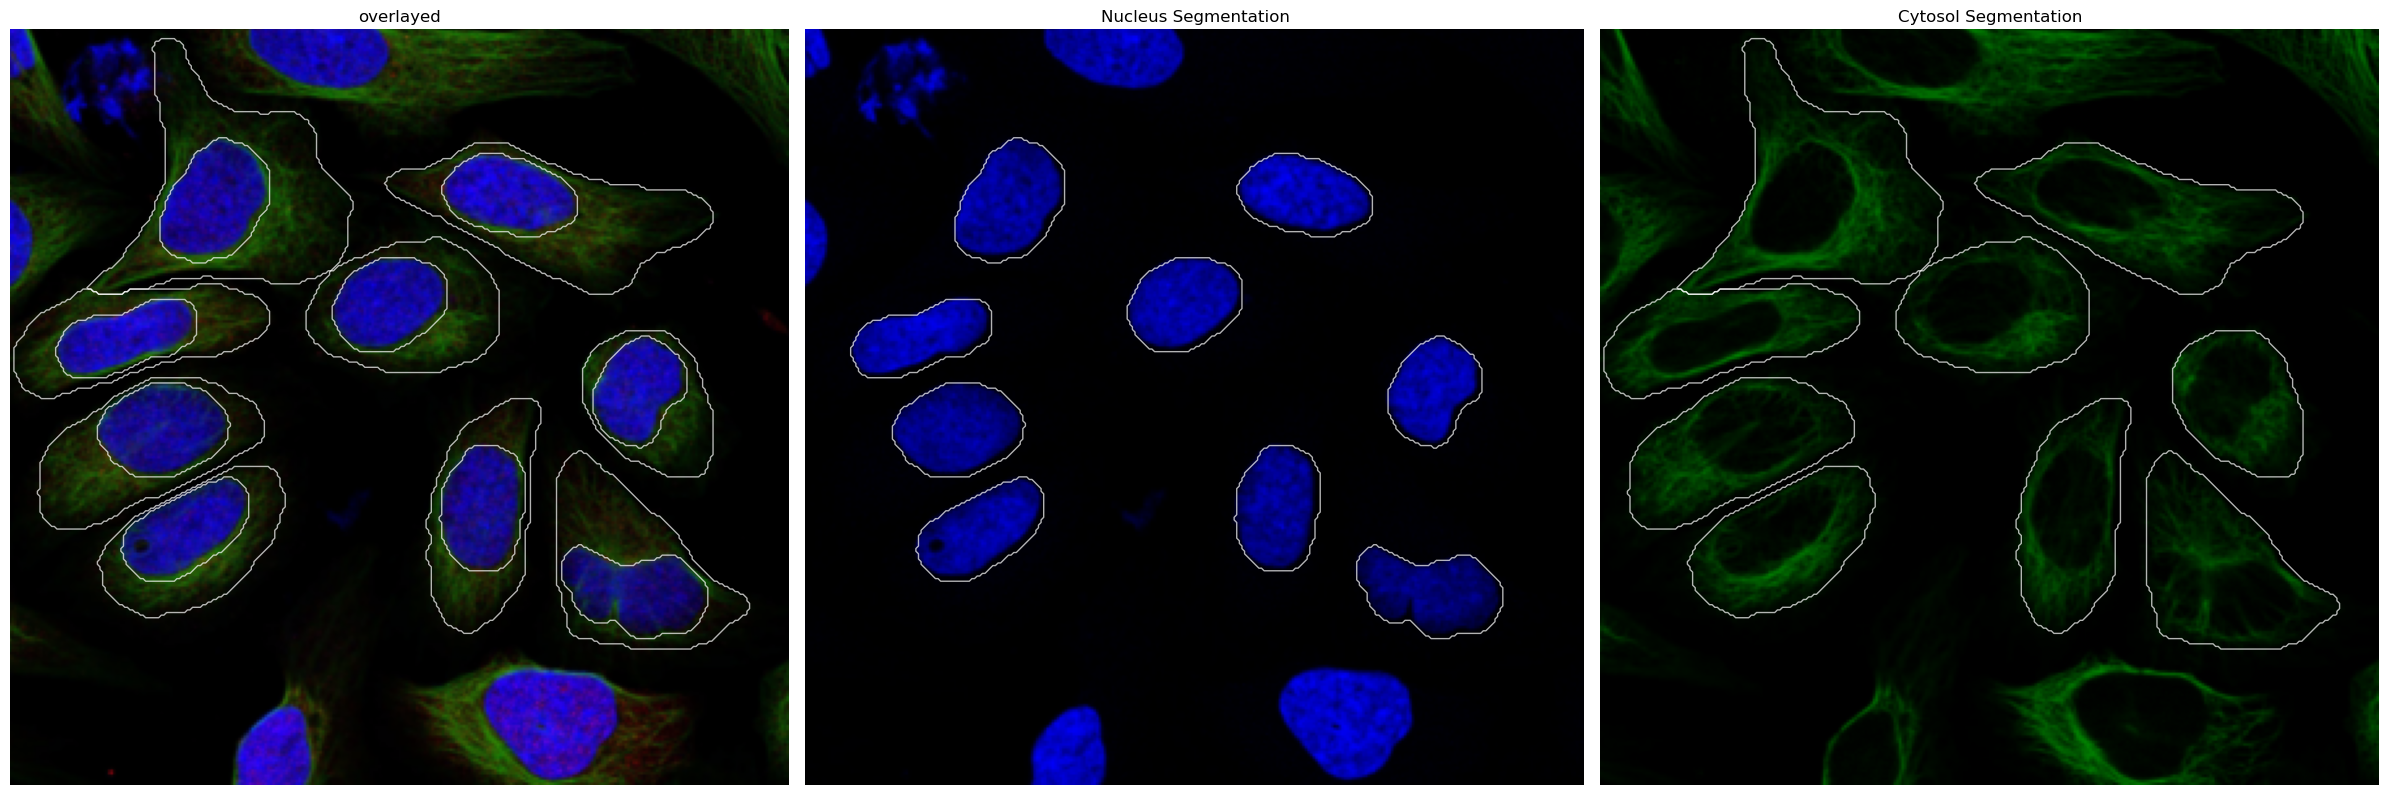

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

[20/03/2025 14:22:41] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_br2vi4r7 for HDF5CellExtraction
[20/03/2025 14:22:41] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/extraction/data
[20/03/2025 14:22:41] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/extraction/data
[20/03/2025 14:22:41] Found 2 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_nucleus', 'seg_all_cytosol']
[20/03/2025 14:22:41] Using seg_all_nucleus as the main segmentation mask to determine cell centers.
[20/03/2025 14:22:41] A total of 1 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/ex

Extracting cell batches:   0%|          | 0/1 [00:00<?, ?it/s]

[20/03/2025 14:22:41] Finished extraction in 0.15 seconds (54.46 cells / second)
[20/03/2025 14:22:42] Benchmarking times saved to file.
[20/03/2025 14:22:42] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_br2vi4r7'>


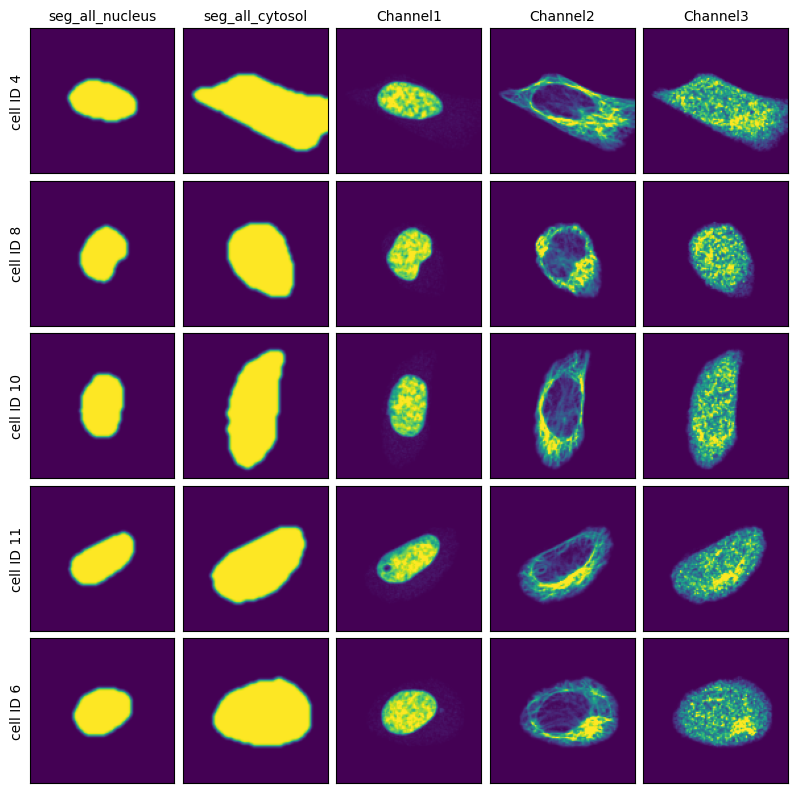

In [8]:
project.plot_single_cell_images()

In [9]:
project.featurize(overwrite = True)

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/extraction/data/single_cells.h5sc
[20/03/2025 14:22:53] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/CellFeaturizer_wmfki2xv for CellFeaturizer
[20/03/2025 14:22:53] Started CellFeaturization of all available channels.
[20/03/2025 14:22:53] Overwrite flag is set, deleting existing directory for featurization results.
[20/03/2025 14:22:53] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_2/project_downsampling/featurization/complete_CellFeaturizer
[20/03/2025 14:22:53] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[20/03/2025 14:22:53] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/exa

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,nucleus_area,cytosol_area,cytosol_only_area,Channel1_mean_nucleus,Channel1_median_nucleus,Channel1_quant75_nucleus,Channel1_quant25_nucleus,Channel1_summed_intensity_nucleus,Channel1_summed_intensity_area_normalized_nucleus,Channel1_mean_cytosol,...,Channel3_summed_intensity_cytosol,Channel3_summed_intensity_area_normalized_cytosol,Channel3_mean_cytosol_only,Channel3_median_cytosol_only,Channel3_quant75_cytosol_only,Channel3_quant25_cytosol_only,Channel3_summed_intensity_cytosol_only,Channel3_summed_intensity_area_normalized_cytosol_only,label,cell_id
0,2171.0,6501.0,4330.0,0.094401,0.0,0.024994,0.0,1142.25700,0.263801,0.094401,...,2089.6729,0.482603,0.172700,0.0,0.333252,0.0,2089.6729,0.482603,0,3
1,1912.0,4568.0,2656.0,0.074075,0.0,0.010139,0.0,896.30835,0.337465,0.074075,...,1762.5309,0.663604,0.145664,0.0,0.142822,0.0,1762.5309,0.663604,0,4
2,1888.0,3983.0,2095.0,0.079451,0.0,0.004189,0.0,961.35390,0.458880,0.079451,...,1475.2004,0.704153,0.121917,0.0,0.067871,0.0,1475.2004,0.704153,0,6
3,1718.0,3012.0,1294.0,0.067254,0.0,0.000000,0.0,813.76760,0.628878,0.067254,...,1150.5413,0.889135,0.095086,0.0,0.000000,0.0,1150.5413,0.889135,0,8
4,2096.0,4286.0,2190.0,0.086380,0.0,0.006791,0.0,1045.19570,0.477258,0.086380,...,1515.9556,0.692217,0.125286,0.0,0.106750,0.0,1515.9556,0.692217,0,9
5,1945.0,3873.0,1928.0,0.076503,0.0,0.000376,0.0,925.68950,0.480129,0.076503,...,1508.1467,0.782234,0.124640,0.0,0.006575,0.0,1508.1467,0.782234,0,10
6,1954.0,3678.0,1724.0,0.073058,0.0,0.000256,0.0,884.00140,0.512762,0.073058,...,1361.4031,0.789677,0.112513,0.0,0.003231,0.0,1361.4031,0.789677,0,11
7,2165.0,4542.0,2377.0,0.081356,0.0,0.015686,0.0,984.40380,0.414137,0.081356,...,1639.8943,0.689901,0.135528,0.0,0.181763,0.0,1639.8943,0.689901,0,12
